# Traffic Sign Classifier with LeNET Architecture

In [ ]:
import numpy as np
import cv2
import random
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
import pydot
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
#unpickling Data
with open('Data/train.p','rb') as f:
    train_data = pickle.load(f)
with open('Data/test.p','rb') as f:
    test_data = pickle.load(f)
with open('Data/valid.p','rb') as f:
    val_data = pickle.load(f)

In [4]:
#Assigning Data for training, testing and Validation
X_train,y_train = train_data['features'],train_data['labels']
X_test,y_test = test_data['features'],test_data['labels']
X_val,y_val = val_data['features'],val_data['labels']

In [5]:
data = pd.read_csv('Data/signnames.csv')
data.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


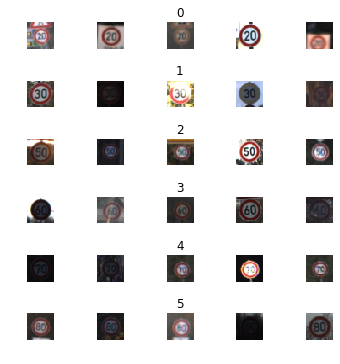

In [6]:
#Visualizing few signs
num_of_samples = []
 
cols = 5
num_classes = 6
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 5))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

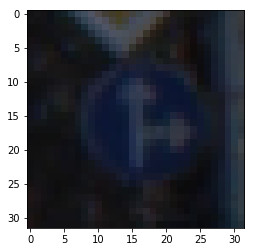

In [7]:
plt.imshow(X_train[1000])

(-0.5, 31.5, 31.5, -0.5)

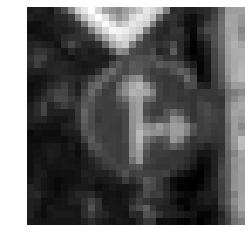

In [8]:
#Grayscale Function 

def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
img = (X_train[1000])
img = grayscale(img)
#cv2.imshow('img',img)
#cv2.waitKey(40)
plt.imshow(img,cmap = plt.get_cmap('gray'))
plt.axis('off')

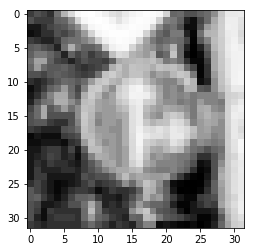

In [9]:
#histogram Equalization 

def equalize(img):
    img = cv2.equalizeHist(img)
    return img
img = equalize(img)
plt.imshow(img,cmap = plt.get_cmap('gray'))

In [10]:
#preprocessing = Grayscale + Histogram Equalization
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
X_train = np.array(list(map(preprocessing,X_train)))
X_test = np.array(list(map(preprocessing,X_test)))
X_val = np.array(list(map(preprocessing,X_val)))


In [11]:
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)


(12630, 32, 32)
(34799, 32, 32)
(4410, 32, 32)


In [12]:
X_train = X_train.reshape((34799, 32, 32,1));
X_test = X_test.reshape(12630, 32, 32,1);
X_val = X_val.reshape(4410, 32, 32,1);
print(X_val.shape)

(4410, 32, 32, 1)


In [13]:
y_train = to_categorical(y_train,43);
y_test  = to_categorical(y_test,43);
y_val    = to_categorical(y_val,43);

In [56]:
#CNN Architecture
def custom_model():
    model = Sequential()
    model.add(Conv2D(60 , (5,5), input_shape = (32,32,1),activation = 'relu'))
    model.add(Conv2D(60 , (5,5),activation = 'relu'))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Dropout(0.4))
    model.add(Conv2D(30 , (3,3),activation = 'relu'))
    model.add(Conv2D(30 , (3,3),activation = 'relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(500,activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(43,activation= 'softmax'))
    model.compile(Adam(lr = 0.01),loss = 'categorical_crossentropy',metrics= ['accuracy'])
    return model

In [57]:
#Model Visualization
model = custom_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 30)          0         
__________

In [58]:
#Training Model
history = model.fit(X_train,y_train, validation_data = (X_val,y_val), verbose = 1,batch_size = 400,epochs = 20,shuffle = 1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 7s 209us/step - loss: 3.4648 - acc: 0.0789 - val_loss: 2.6907 - val_acc: 0.2757
Epoch 2/20
34799/34799 [==============================] - 6s 164us/step - loss: 1.2731 - acc: 0.6230 - val_loss: 0.6604 - val_acc: 0.8179
Epoch 3/20
34799/34799 [==============================] - 6s 163us/step - loss: 0.5516 - acc: 0.8313 - val_loss: 0.4790 - val_acc: 0.8834
Epoch 4/20
34799/34799 [==============================] - 6s 164us/step - loss: 0.4070 - acc: 0.8741 - val_loss: 0.3601 - val_acc: 0.9172
Epoch 5/20
34799/34799 [==============================] - 6s 165us/step - loss: 0.3299 - acc: 0.9002 - val_loss: 0.2882 - val_acc: 0.9256
Epoch 6/20
34799/34799 [==============================] - 6s 165us/step - loss: 0.2976 - acc: 0.9074 - val_loss: 0.2471 - val_acc: 0.9313
Epoch 7/20
34799/34799 [==============================] - 6s 164us/step - loss: 0.2717 - acc: 0.9159 - val_loss: 0.2752 - v

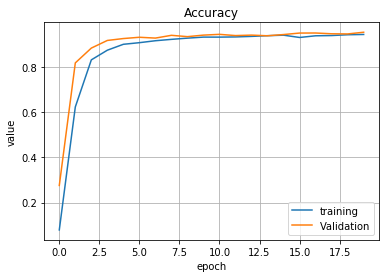

In [59]:
#Visualizing accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','Validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('value')
plt.grid(axis= 'both')

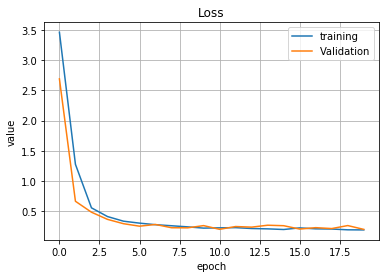

In [60]:
#Visualizing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','Validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('value')
plt.grid(axis= 'both')

In [61]:
#Verifying the model against test data set
score = model.evaluate(X_test,y_test,verbose = 0)
print("The accuracy is ", score[1])

The accuracy is  0.9294536817574067
